# Notebook 1. Espacio de probabilidad

Elaboró: **Arellanos Balcázar Carlos Japhet**

16 de abril de 2025

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fundamentos del Espacio de Probabilidad

La teoría de la probabilidad surge como una herramienta matemática para estudiar fenómenos cuyo resultado no puede preverse con certeza, incluso cuando se repiten bajo condiciones idénticas. En estos **experimentos aleatorios**, los resultados individuales varían, y es precisamente esta variabilidad lo que motiva la necesidad de construir modelos matemáticos que permitan describir, analizar y predecir su comportamiento.

El concepto central que organiza esta teoría es el de **espacio de probabilidad**, el cual formaliza la idea de asociar valores numéricos —probabilidades— a los diferentes eventos posibles dentro de un experimento. Dependiendo del contexto, de la naturaleza del fenómeno observado y de la información disponible, existen distintos enfoques para definir y trabajar con estos modelos probabilísticos.

Este trabajo presenta tres enfoques fundamentales para el estudio de la probabilidad:

- El **modelo clásico**, basado en el conteo de casos favorables y la suposición de equiprobabilidad;
- El **modelo geométrico**, que se apoya en la proporción de medidas dentro de un espacio continuo;
- Y el **modelo frecuentista**, en el que la probabilidad se concibe como el límite de la frecuencia relativa de ocurrencia de un evento, tras muchas repeticiones del experimento.

Cada uno de estos enfoques ofrece herramientas conceptuales y metodológicas distintas, y su estudio conjunto permite una comprensión más amplia y sólida del razonamiento probabilístico.


## Enfoque Clásico (Modelo Laplaciano)

### Introducción

El enfoque **clásico**, también conocido como **modelo de Laplace**, es el más antiguo y fue desarrollado inicialmente para estudiar juegos de azar. Se basa en el supuesto de que todos los resultados del experimento son igualmente probables.

### Definición Formal

Sean:
- $\Omega$: espacio muestral finito,
- $A \subseteq \Omega$: evento de interés.

Si todos los elementos de $\Omega$ son equiprobables, la probabilidad de $A$ se define como:

$$
P(A) = \frac{\#A}{\#\Omega}
$$

donde $\#A$ es el número de casos favorables y $\#\Omega$ es el número total de resultados posibles.

### Consideraciones
- Es aplicable solo si hay **equiprobabilidad**.
- Útil en **juegos finitos** como dados, monedas, urnas, etc.
- Proporciona una interpretación intuitiva de la probabilidad como proporción de casos favorables.

### Propiedades básicas derivadas:
- $P(\Omega) = 1$,
- $P(\emptyset) = 0$,
- Si $A \cap B = \emptyset$, entonces $P(A \cup B) = P(A) + P(B)$.

**Ejercicio**:  
Se lanza un dado justo de seis caras. ¿Cuál es la probabilidad de obtener un número par?

**Modelo aplicado**:  
Usamos el modelo clásico de probabilidad (Laplaciano):

$$
P(A) = \frac{\#A}{\#\Omega}
$$

donde:
- $\Omega = \{1, 2, 3, 4, 5, 6\}$,
- $A = \{2, 4, 6\}$.


In [2]:
# Espacio muestral
omega = [1, 2, 3, 4, 5, 6]

# Evento: obtener número par
evento_A = [x for x in omega if x % 2 == 0]

# Cálculo de probabilidad
P_A = len(evento_A) / len(omega)
print(f"Probabilidad de obtener un número par: {P_A:.2f}")

Probabilidad de obtener un número par: 0.50


## Enfoque Geométrico

### Introducción

El **modelo geométrico** generaliza la probabilidad clásica a contextos en los que el espacio muestral es continuo. Aquí, los eventos se definen mediante **regiones** del espacio, y la probabilidad se calcula en función de su **medida geométrica** (longitud, área, volumen).

### Definición Formal

Sean:
- $\Omega \subseteq \mathbb{R}^n$: espacio muestral con medida geométrica finita,
- $A \subseteq \Omega$: evento medible.

La probabilidad se define como:

$$
P(A) = \frac{\mu(A)}{\mu(\Omega)}
$$

donde $\mu$ representa la medida adecuada (longitud si $n = 1$, área si $n = 2$, volumen si $n = 3$, etc.).

### Consideraciones

- Supone que **todos los puntos** en $\Omega$ son igualmente probables en sentido continuo.
- Muy útil para problemas como:
  - Tiempo aleatorio de llegada (problema del encuentro),
  - Selección de puntos en una figura geométrica.

> Ejemplo clásico:  
> Elegir un punto al azar en el intervalo [0,1].  
> Probabilidad de que esté entre 0.2 y 0.5:

$$
P([0.2, 0.5]) = \frac{0.5 - 0.2}{1 - 0} = 0.3
$$

**Problema del Encuentro**:  
Dos personas acuerdan reunirse entre las 9:00 y 10:00 hrs. Cada una llega en un instante aleatorio (uniforme) durante esa hora.  
Si una espera **10 minutos como máximo**, ¿cuál es la probabilidad de que se encuentren?

**Modelo aplicado**:  
Usamos el modelo de probabilidad geométrica, considerando un área uniforme en el cuadrado unitario $[0,1] \times [0,1]$, y calculamos el área donde $|x - y| \leq \frac{1}{6}$.


In [3]:
# Simulación del problema del encuentro
N = 100000
tolerancia = 10 / 60  # 10 minutos en horas

# Llegadas aleatorias entre 0 y 1 hora
llegadas_1 = np.random.uniform(0, 1, N)
llegadas_2 = np.random.uniform(0, 1, N)

# Evento: diferencia menor a tolerancia
se_encuentran = np.abs(llegadas_1 - llegadas_2) <= tolerancia

# Estimación de probabilidad
P_encuentro = np.mean(se_encuentran)
print(f"Probabilidad estimada de encuentro: {P_encuentro:.4f}")

Probabilidad estimada de encuentro: 0.3048


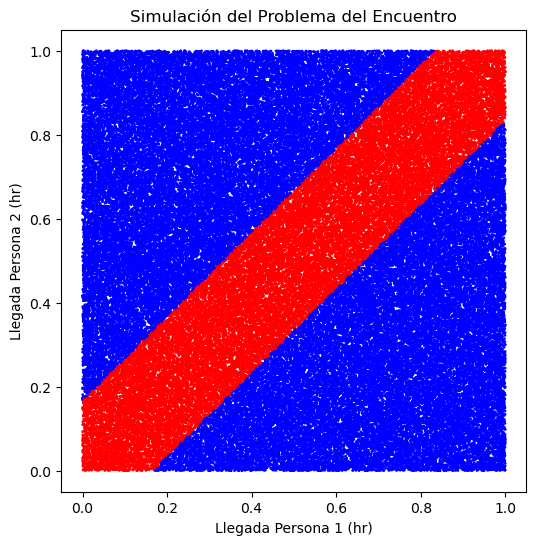

In [4]:
# Visualización del área donde ocurre el encuentro
plt.figure(figsize=(6,6))
plt.scatter(llegadas_1, llegadas_2, s=1,
            c=np.where(np.abs(llegadas_1 - llegadas_2) <= tolerancia, 'r', 'b'))
plt.xlabel('Llegada Persona 1 (hr)')
plt.ylabel('Llegada Persona 2 (hr)')
plt.title('Simulación del Problema del Encuentro')
plt.show()

## Enfoque Frecuentista

### Introducción

El enfoque **frecuentista** interpreta la probabilidad como el resultado de la **experiencia repetida**. Se enfoca en la **frecuencia relativa** con la que ocurre un evento, y cómo esta converge a un valor constante al aumentar el número de repeticiones.

### Definición Formal

Sea un experimento repetido $n$ veces, y sea $n_A$ el número de veces que ocurre el evento $A$. Entonces:

$$
P(A) = \lim_{n \to \infty} \frac{n_A}{n}
$$

### Consideraciones

- Es el enfoque que subyace en la **estadística inferencial**.
- No requiere conocer todo el espacio muestral, solo contar **ocurrencias observadas**.
- Fundamental para métodos de simulación como el método de **Monte Carlo**.

**Ejercicio**:  
Lanzamos una moneda equilibrada 1000 veces y estimamos la probabilidad de obtener “cara”.

**Modelo aplicado**:  
Probabilidad frecuentista:

$$
P(A) \approx \frac{n_A}{n}
$$

donde $n$ es el número de repeticiones y $n_A$ es el número de veces que ocurre el evento.

In [5]:
# Número de lanzamientos
n_lanzamientos = 1000

# Simulación: cara = 1, cruz = 0
resultados = np.random.choice([0, 1], size=n_lanzamientos)

# Frecuencia relativa acumulada
frecuencia_relativa = np.cumsum(resultados) / np.arange(1, n_lanzamientos + 1)

# Estimación final
print(f"Estimación de P(cara): {frecuencia_relativa[-1]:.4f}")

Estimación de P(cara): 0.4900
